**MNIST Handwritten Digit Classification using Deep Learning (Artificial Neural Network)**

Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Check the type of X_train
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images<br>
Test data = 10,000 Images<br>
Image dimension -> 28 x 28<br>
Grayscale Image -> 1 Channel

In [ ]:
# Printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
# Print the shape of 10th data in the X_train
print(X_train[10].shape)

(28, 28)


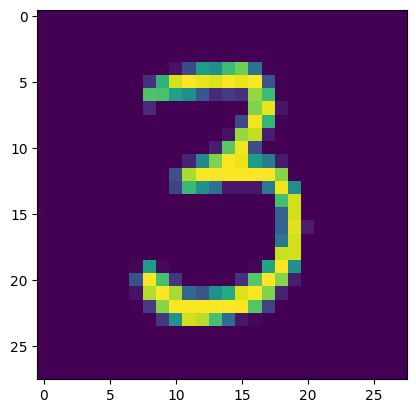

3


In [ ]:
# Displaying the image
plt.imshow(X_train[50])
plt.show()

# Print the corresponding label
print(Y_train[50])

Image Lables

In [ ]:
# Print the shapes of Y_train and Y_test
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# Unique values in Y_train
print(np.unique(Y_train))

# Unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, if not we have to resize all the images toa common dimension

In [ ]:
# Scaling the values

X_train = X_train/255
X_test = X_test/255

In [ ]:
# After Scaling Printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')  # Output layer
])

In [ ]:
# Compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2960 - accuracy: 0.9150
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1427 - accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1063 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0844 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0692 - accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0593 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.9864
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0385 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.033

Training data accuracy = 98.88 %

**Accuracy on Test data**

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy : ', accuracy)
print('Loss     : ', loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0935 - accuracy: 0.9754
Accuracy :  0.9753999710083008
Loss     :  0.09351196885108948


Testing data accuracy = 97.54 %

In [ ]:
print(X_test.shape)

(10000, 28, 28)


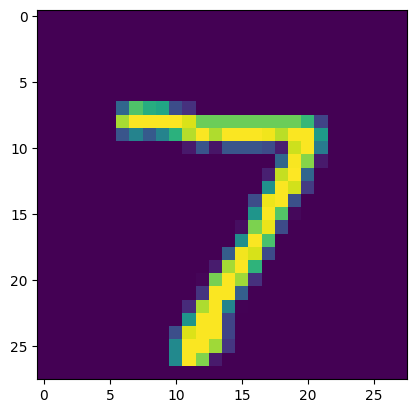

In [ ]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[3.43861394e-02 6.86246040e-06 1.45852775e-03 5.96325099e-01
 1.17226364e-07 1.21669681e-03 8.34940366e-08 9.99988496e-01
 3.42127919e-01 4.12431024e-02]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# Converting the prediction probability to class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
print(Y_pred)

[[3.43861394e-02 6.86246040e-06 1.45852775e-03 ... 9.99988496e-01
  3.42127919e-01 4.12431024e-02]
 [4.28947004e-07 8.34292710e-01 9.99991477e-01 ... 8.60745259e-14
  1.02776036e-01 5.28969013e-12]
 [9.33856878e-04 9.99793291e-01 2.42439508e-01 ... 5.45532443e-02
  1.09141745e-01 1.91614665e-02]
 ...
 [3.87283762e-05 1.12806745e-04 2.03037700e-07 ... 2.20614552e-01
  7.88646503e-05 7.80134976e-01]
 [1.00805570e-04 1.20206801e-02 1.29562395e-07 ... 2.23080092e-03
  7.39077449e-01 5.29567806e-05]
 [2.22039409e-04 3.68863787e-03 1.37045503e-01 ... 3.75434350e-09
  2.36770662e-04 6.20452786e-11]]


In [ ]:
# Converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels<br>
Y_pred_labels --> Predicted Labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 968    0    2    1    0    1    3    1    3    1]
 [   0 1126    1    1    0    0    2    0    5    0]
 [   3    0  998    4    5    1    5    4   12    0]
 [   0    1    6  982    0    5    0    3    3   10]
 [   0    3    5    0  962    1    3    2    1    5]
 [   2    0    0    6    1  872    3    2    3    3]
 [   5    1    2    0    7    4  935    1    3    0]
 [   1    8   13    1    0    0    0  994    1   10]
 [   2    1    3    2   10    3    1    2  945    5]
 [   1    5    0    9    9    2    1    7    3  972]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

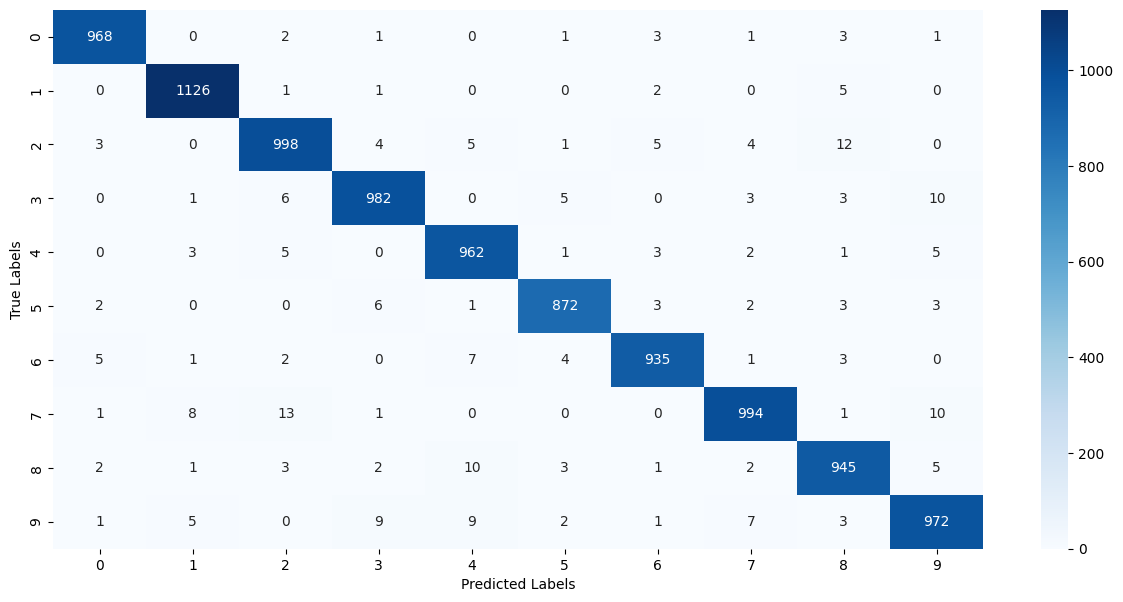

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a Predictive System**

In [ ]:
input_image_path = '/content/sample_data/number_three.png'
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

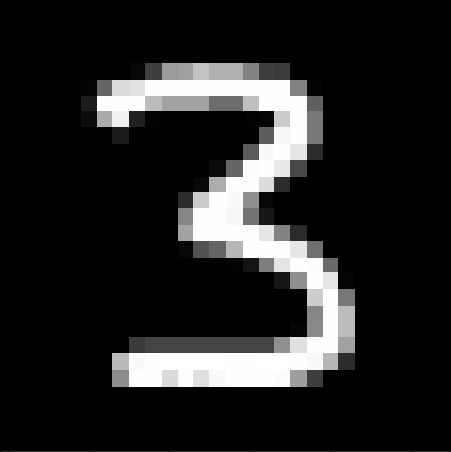

In [ ]:
cv2_imshow(input_image)

In [ ]:
print(input_image.shape)

(452, 451, 3)


In [ ]:
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale_image.shape

(452, 451)

In [ ]:
input_image_resize = cv2.resize(grayscale_image, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 32ms/step
[[5.8777527e-13 3.2112584e-03 5.3576217e-04 1.0000000e+00 4.6726932e-06
  5.0471008e-01 3.3065542e-13 4.8173890e-05 2.2971479e-02 6.1132745e-03]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted :/content/sample_data/number_three.png


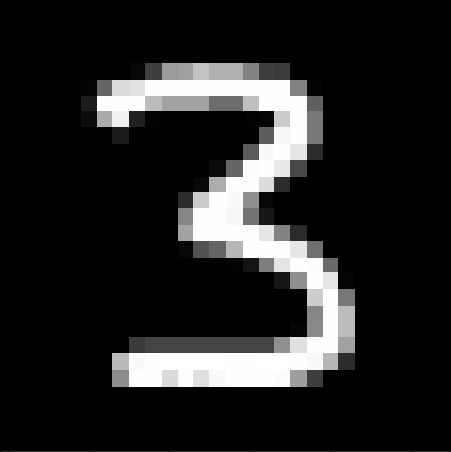

1/1 [==============================] - 0s 31ms/step
The Handwritten Digit is recognized as  3


In [ ]:
input_image_path = input('Path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale_image, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognized as ', input_pred_label)
